# A1

Assume that the curve is $y = f(x;a, b) = ax + b$. You are asked to find the $a, b$ that makes the curve best fit the data `pA1.csv`. Requirements:

1. A PyTorch code that outputs $a$ and $b$. You get the points only if predicted $a, b$ and ground truth $\hat a, \hat b$ satisfies $|\hat a - a| \le 0.2$ and $|\hat b - b| \le 0.2$. (8 points)
2. A 3D figure that visualizes the loss function (of whole dataset) against parameters space. The figure may differ with different setting. (7 points)

## 1. Import Library & Dataset

In [0]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d 
import torch
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [184]:
!wget -nc 140.114.76.113:8000/pA1.csv
!wget -nc 140.114.76.113:8000/pA2.csv

File ‘pA1.csv’ already there; not retrieving.

File ‘pA2.csv’ already there; not retrieving.



In [185]:
pa1 = pd.read_csv('pA1.csv')
print(pa1.head())
print(pa1.shape)

       x      y
0  0.375  6.107
1  0.951  8.891
2  0.732  7.880
3  0.599  7.191
4  0.156  4.829
(50, 2)


## 2. Data Preprocessing

In [0]:
# Split data to training and validation
def train_validation(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  ## Transfer Dataframe to Tensor
  Lx = X_train.values.tolist()
  Ly = y_train.values.tolist()
  Lx_test = X_test.values.tolist()
  Ly_test = y_test.values.tolist()
  
  #del X_train, X_test, y_train, y_test; gc.collect()
  Tx = torch.tensor([[x] for x in Lx], dtype = torch.float)
  Ty = torch.tensor([[y] for y in Ly], dtype = torch.float)
  Tx_test = torch.tensor([[x] for x in Lx_test], dtype = torch.float)
  Ty_test = torch.tensor([[y] for y in Ly_test], dtype = torch.float)
  return Tx, Ty, Tx_test, Ty_test

In [187]:
device = torch.device("cuda")
dtype = torch.float
a = torch.randn(1, 1, dtype=dtype, requires_grad=True)
b = torch.randn(1, 1, dtype=dtype, requires_grad=True)
a

tensor([[-0.7590]], requires_grad=True)

In [0]:
learning_rate = 0.0004
iterations=5000
batch = 100
loss_history= np.zeros(int(iterations/batch))
Val_loss_history = np.zeros(int(iterations/batch))
a_history= np.zeros(int(iterations/batch))
b_history= np.zeros(int(iterations/batch))
EPOCHS = np.zeros(int(iterations/batch))
EPO = 0

## 3. Model Training

In [189]:
for t in range(iterations):
    Tx, Ty, Tx_test, Ty_test = train_validation(pa1['x'], pa1['y'])     
    y_pred = Tx.mm(a)+b
    loss = (y_pred - Ty).pow(2).sum()

    loss.backward()
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
    # Manually zero the gradients after updating weights
        a.grad.zero_()
        b.grad.zero_()

    if (t)%batch == 0:
        EPO = EPO+1
        a_history[int(t/batch)]=a
        b_history[int(t/batch)]=b
        
        y_pred = Tx.mm(a)+b
        loss = (y_pred - Ty).pow(2).sum()
        loss_history[int(t/batch)]=loss.item()  

        val_y = Tx_test.mm(a)+b
        loss_val = (val_y - Ty_test).pow(2).sum()
        Val_loss_history[int(t/batch)]=loss_val.item()
        EPOCHS[int(t/batch)]=EPO
        print('EPOCHS: ', EPO,'loss_train: ', loss.item(), 'loss_val: ', loss_val.item())

EPOCHS:  1 loss_train:  2819.298583984375 loss_val:  723.439453125
EPOCHS:  2 loss_train:  14.225619316101074 loss_val:  3.747955322265625
EPOCHS:  3 loss_train:  8.85653305053711 loss_val:  2.292576789855957
EPOCHS:  4 loss_train:  6.056476593017578 loss_val:  1.5860298871994019
EPOCHS:  5 loss_train:  4.244088172912598 loss_val:  1.1253782510757446
EPOCHS:  6 loss_train:  3.070831537246704 loss_val:  0.8236674070358276
EPOCHS:  7 loss_train:  2.311309814453125 loss_val:  0.6255180239677429
EPOCHS:  8 loss_train:  1.8196271657943726 loss_val:  0.4949658215045929
EPOCHS:  9 loss_train:  1.5013375282287598 loss_val:  0.40861889719963074
EPOCHS:  10 loss_train:  1.2952910661697388 loss_val:  0.3512466549873352
EPOCHS:  11 loss_train:  1.1619056463241577 loss_val:  0.31291890144348145
EPOCHS:  12 loss_train:  1.075555682182312 loss_val:  0.2871516942977905
EPOCHS:  13 loss_train:  1.0196565389633179 loss_val:  0.26970264315605164
EPOCHS:  14 loss_train:  0.9834716320037842 loss_val:  0.25

## 4. Result

Text(0, 0.5, 'Loss')

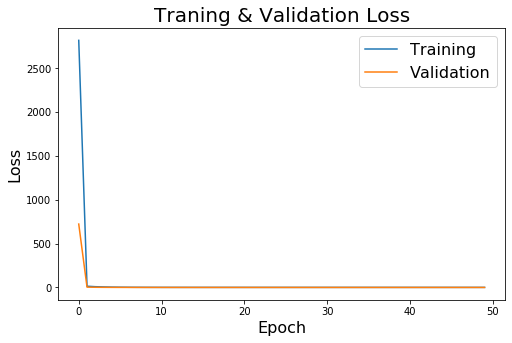

In [190]:
plt.figure(figsize=(8,5))
plt.plot(loss_history, label='Training')
plt.plot(Val_loss_history, label='Validation')
plt.title('Traning & Validation Loss',fontsize=20)
plt.legend(loc='upper right',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)

1. A PyTorch code that outputs $a$ and $b$. You get the points only if predicted $a, b$ and ground truth $\hat a, \hat b$ satisfies $|\hat a - a| \le 0.2$ and $|\hat b - b| \le 0.2$. (8 points)

Text(0, 0.5, "Dependent Variable 'y'")

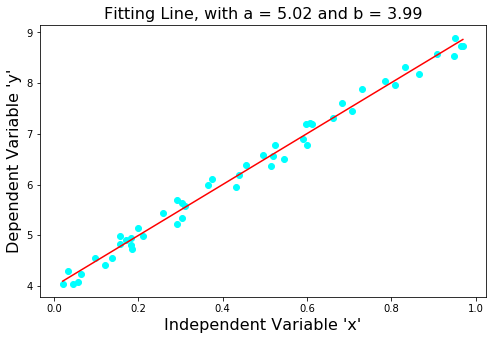

In [191]:
x_min, y_min, x_max, y_max = min(pa1['x']) , min(pa1['y']) , max(pa1['x']) , max(pa1['y'])
plt.figure(figsize=(8,5))
plt.scatter(pa1['x'], pa1['y'] , color = 'cyan')
plt.plot((x_min, x_max), (a*x_min + b, a*x_max + b), color = 'r')
plt.title('Fitting Line, with a = {} and b = {}'.format(round(a.data.numpy().tolist()[0][0], 2), round(b.data.numpy().tolist()[0][0], 2)),fontsize=16)
plt.xlabel("Independent Variable 'x'",fontsize=16)
plt.ylabel("Dependent Variable 'y'",fontsize=16)

Text(0.5, 0.92, '3D figure of Loss trend')

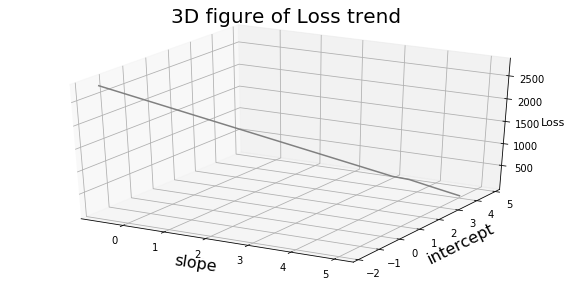

In [192]:
fig = plt.figure(figsize=(10,5)) 
ax = plt.axes(projection="3d")
ax.set_xlabel('slope', fontsize=16)
ax.set_ylabel('intercept', fontsize=16)
ax.set_zlabel('Loss', fontsize=11) 
ax.plot3D(a_history, b_history, loss_history, 'gray')
plt.title("3D figure of Loss trend", fontsize=20)

In [0]:
X = np.array(a_history)
Y = np.array(b_history)
X, Y= np.meshgrid(X, Y)

Z = np.zeros((50,50))
for j in range(50):
  for i in range(50):
    for k in range(50):
      Z[j,i] = Z[j,i] + (X[j,i]*pa1['x'][k] + Y[j,i] - pa1['y'][k])**2

2. A 3D figure that visualizes the loss function (of whole dataset) against parameters space. The figure may differ with different setting. (7 points)

Text(0.5, 0.92, '3D figure of Loss trend & surface')

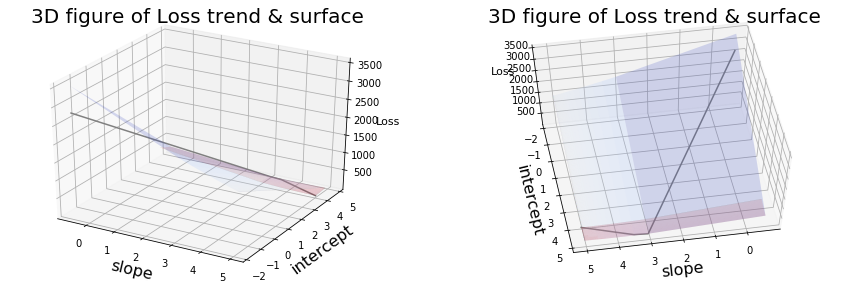

In [194]:
fig = plt.figure(figsize=(15,5)) 
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('slope', fontsize=16)
ax.set_ylabel('intercept', fontsize=16)
ax.set_zlabel('Loss', fontsize=11) 
ax.plot3D(a_history, b_history, loss_history, 'gray')
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm_r',alpha = 0.2)
plt.title("3D figure of Loss trend & surface", fontsize=20)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('slope', fontsize=16)
ax.set_ylabel('intercept', fontsize=16)
ax.set_zlabel('Loss', fontsize=11)
ax.view_init(60, 80)
ax.plot3D(a_history, b_history, loss_history, 'gray')
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm_r',alpha = 0.2)
plt.title("3D figure of Loss trend & surface", fontsize=20)

# A2
You are asked to fit the data `pA2.csv` using following model:

$$
y = f(x; \mathbf{w}) = w_0 x^2 + w_1 x + w_2
$$

where $\mathbf{w}$ are parameters.

Your code outputs $w_0, w_1, w_2$. Similar to problem A1, you get the points only if predicted $\mathbf{w}$ and ground truth $\mathbf{\hat w}$ satisfies $|w_0 - \hat w_0| < 0.2$, $|w_1 - \hat w_1| < 0.2$ and $|w_2 - \hat w_2| < 0.2$. Requirements:
1. Use `nn.Linear`(PyTorch) / `Dense`(Keras or Tensorflow) to accomplish the task. (8 points)

## 1. Import Data

In [195]:
pa2 = pd.read_csv('pA2.csv')
pa2 = pa2.sort_values(by='x')
print(pa2.head())
print(pa2.shape)

        x      y
28 -0.493  3.064
0  -0.469  3.133
45 -0.463  3.093
48 -0.449  3.188
9  -0.423  3.242
(50, 2)


## 2. Data Preprocessing

In [0]:
# Split data to training and validation
def train_validation(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  ## Transfer Dataframe to Tensor
  Lx = X_train.values.tolist()
  Ly = y_train.values.tolist()
  Lx_test = X_test.values.tolist()
  Ly_test = y_test.values.tolist()
  
  #del X_train, X_test, y_train, y_test; gc.collect()
  Tx = torch.tensor([[x] for x in Lx], dtype = torch.float)
  Ty = torch.tensor([[y] for y in Ly], dtype = torch.float)
  Tx_test = torch.tensor([[x] for x in Lx_test], dtype = torch.float)
  Ty_test = torch.tensor([[y] for y in Ly_test], dtype = torch.float)
  return Tx, Ty, Tx_test, Ty_test

In [0]:
dtype = torch.float
w0 = torch.randn(1, 1, dtype=dtype, requires_grad=True)
w1 = torch.randn(1, 1, dtype=dtype, requires_grad=True)
w2 = torch.randn(1, 1, dtype=dtype, requires_grad=True)

In [0]:
learning_rate = 0.002
iterations=5000
batch = 100
loss_history= np.zeros(int(iterations/batch))
Val_loss_history = np.zeros(int(iterations/batch))
w0_history= np.zeros(int(iterations/batch))
w1_history= np.zeros(int(iterations/batch))
w2_history= np.zeros(int(iterations/batch))
EPOCHS = np.zeros(int(iterations/batch))
EPO = 0

## 3. Model Training

In [199]:
for t in range(iterations):          
    Tx, Ty, Tx_test, Ty_test = train_validation(pa2['x'], pa2['y'])

    y_pred = (Tx**2).mm(w0)+Tx.mm(w1) + w2
    loss = (y_pred - Ty).pow(2).sum()

    loss.backward()
    with torch.no_grad():
        w0 -= learning_rate * w0.grad
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
    # Manually zero the gradients after updating weights
        w0.grad.zero_()
        w1.grad.zero_()
        w2.grad.zero_()

    if (t)%batch == 0:
        EPO = EPO+1
        w0_history[int(t/batch)]=w0
        w1_history[int(t/batch)]=w1
        w2_history[int(t/batch)]=w2
        
        y_pred = (Tx**2).mm(w0)+Tx.mm(w1) + w2
        loss = (y_pred - Ty).pow(2).sum()
        loss_history[int(t/batch)]=loss.item()  

        val_y = (Tx_test**2).mm(w0)+Tx_test.mm(w1) + w2
        loss_val = (val_y - Ty_test).pow(2).sum()
        Val_loss_history[int(t/batch)]=loss_val.item()
        EPOCHS[int(t/batch)]=EPO
        print('EPOCHS: ', EPO,'loss_train: ', loss.item(), 'loss_val: ', loss_val.item())

EPOCHS:  1 loss_train:  396.8759460449219 loss_val:  96.95582580566406
EPOCHS:  2 loss_train:  2.6995644569396973 loss_val:  0.9934288263320923
EPOCHS:  3 loss_train:  2.1371424198150635 loss_val:  0.7106080055236816
EPOCHS:  4 loss_train:  1.802552342414856 loss_val:  0.5815138220787048
EPOCHS:  5 loss_train:  1.527734637260437 loss_val:  0.4912688732147217
EPOCHS:  6 loss_train:  1.2960078716278076 loss_val:  0.4186103343963623
EPOCHS:  7 loss_train:  1.1002699136734009 loss_val:  0.3577582538127899
EPOCHS:  8 loss_train:  0.9349120855331421 loss_val:  0.3062465488910675
EPOCHS:  9 loss_train:  0.7952186465263367 loss_val:  0.2625056803226471
EPOCHS:  10 loss_train:  0.6772059202194214 loss_val:  0.22531914710998535
EPOCHS:  11 loss_train:  0.5775089859962463 loss_val:  0.19368302822113037
EPOCHS:  12 loss_train:  0.49328550696372986 loss_val:  0.16675201058387756
EPOCHS:  13 loss_train:  0.42213407158851624 loss_val:  0.1438121497631073
EPOCHS:  14 loss_train:  0.36202508211135864 l

2. A plot of loss against iteration or epoch. (7 points)

w0:  tensor([[-1.8976]], requires_grad=True)
w1:  tensor([[0.9699]], requires_grad=True)
w2:  tensor([[3.9916]], requires_grad=True)


Text(0, 0.5, 'Loss')

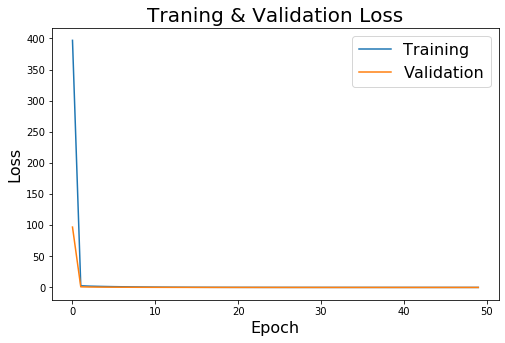

In [200]:
input_epoch = np.array(range(iterations))

print("w0: ",w0)
print("w1: ",w1)
print("w2: ",w2)

plt.figure(figsize=(8,5))
plt.plot(loss_history, label='Training')
plt.plot(Val_loss_history, label='Validation')
plt.title('Traning & Validation Loss',fontsize=20)
plt.legend(loc='upper right',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)

Text(0.5, 1.0, 'Fitting Line, with wo = -1.9 , w1 = 0.97, and w2 = 3.99')

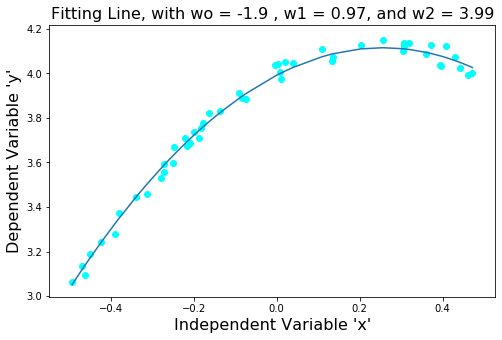

In [201]:
xx = []
yy = []
for x in pa2['x']:
  y = w0*np.power(x,2)+w1*x+w2
  xx.append(x)
  yy.append(y)

w00 = w0.data.numpy().tolist()[0][0]
w11 = w1.data.numpy().tolist()[0][0]
w22 = w2.data.numpy().tolist()[0][0]

#xx.sort
xxx = np.array(xx)

yyy = w00*xxx**2 + w11*xxx + w22

plt.figure(figsize=(8,5))
plt.scatter(pa2['x'], pa2['y'] , color = 'cyan')
plt.plot(xxx, yyy)
plt.xlabel("Independent Variable 'x'",fontsize=16)
plt.ylabel("Dependent Variable 'y'",fontsize=16)
plt.title('Fitting Line, with wo = {} , w1 = {}, and w2 = {}'.format(round(w0.data.numpy().tolist()[0][0], 2), round(w1.data.numpy().tolist()[0][0], 2), round(w2.data.numpy().tolist()[0][0], 2)),fontsize=16)